In [1]:
# ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from matplotlib.ticker import ScalarFormatter
import math
import matplotlib.cm as cm
import pandas as pd
from pandas import Series, DataFrame

from google.colab import files

In [28]:

from matplotlib.colors import ListedColormap
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
#plt.rcParams["font.family"] = "arial"       # 使用するフォント
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 14              # 基本となるフォントの大きさ
plt.rcParams["mathtext.cal"] = "serif"      # TeX表記に関するフォント設定
plt.rcParams["mathtext.rm"] = "serif"       # TeX表記に関するフォント設定
plt.rcParams["mathtext.it"] = "serif:italic"# TeX表記に関するフォント設定
plt.rcParams["mathtext.bf"] = "serif:bold"  # TeX表記に関するフォント設定
plt.rcParams["mathtext.fontset"] = "cm"     # TeX表記に関するフォント設定
plt.rcParams['xtick.direction'] = 'in'            #x軸の目盛線
plt.rcParams['ytick.direction'] = 'in'            #y軸の目盛線
plt.rcParams["figure.subplot.left"] = 0.14  # 余白
plt.rcParams["figure.subplot.bottom"] = 0.14# 余白
plt.rcParams["figure.subplot.right"] =0.90  # 余白
plt.rcParams["figure.subplot.top"] = 0.91   # 余白
plt.rcParams['axes.linewidth'] = 1.0        # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams["xtick.top"] = True            # 上部に目盛り線を描くかどうか
plt.rcParams["xtick.bottom"] = True         # 下部に目盛り線を描くかどうか
plt.rcParams["ytick.left"] = True           # 左部に目盛り線を描くかどうか
plt.rcParams["ytick.right"] = True          # 右部に目盛り線を描くかどうか
plt.rcParams["xtick.major.size"] = 8.0      # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 8.0      # y軸主目盛り線の長さ
plt.rcParams["xtick.major.width"] = 1.0     # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 1.0     # y軸主目盛り線の線幅
plt.rcParams["xtick.minor.size"] = 4.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 4.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 1.0     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 1.0     # y軸副目盛り線の線幅
plt.rcParams["legend.loc"] = "best"         # 凡例の位置、"best"でいい感じのところ
#plt.rcParams["legend.frameon"] = False      # 凡例を囲うかどうか、Trueで囲う、Falseで囲わない
plt.rcParams["legend.frameon"] = True     # 凡例を囲うかどうか、Trueで囲う、Falseで囲わない

from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
import numpy as np
from matplotlib.ticker import ScalarFormatter

In [2]:
import numpy as np
import pandas as pd

# Excel ファイルから読み込み
df = pd.read_excel("/content/drive/MyDrive/excel_In_5Kpm_1.0mg_20250530.xlsx", skiprows=21, usecols="A:D")
# df = pd.read_excel("/content/drive/MyDrive/2AP_07/day1/CalibrationA.xlsx", index_col=0)

df

,min,Cel,uW,uW/min
0,0.000000,146.280426,16.277863,-122.978760
1,0.003333,146.280396,16.683167,-121.214355
2,0.006667,146.280334,17.094360,-119.606323
3,0.010000,146.280212,17.503235,-118.037842
4,0.013333,146.280060,18.001099,-116.563110
...,...,...,...,...
3896,12.986667,144.132370,83.887787,-3.225403
3897,12.990000,144.132584,83.899567,-3.184937
3898,12.993333,144.132767,83.912445,-3.147766
3899,12.996667,144.132950,83.925522,-3.136230


In [15]:
df_edit  = df

In [19]:
mass = 0.0011 #)1.1 mg
g_mol = 114.818 #
mol = mass/g_mol

df_edit ["time(s)"] = df_edit.iloc[:, 0] * 60
df_edit ["temp(K)"] = df_edit.iloc[:, 1] + 273.15
df_edit["dT/dt"] = (df_edit["temp(K)"].shift(1) - df_edit["temp(K)"]) - (df_edit["min"].shift(-1) - df_edit["min"])
df_edit["dT/dt"].fillna(0, inplace=True)
#df_edit["dT/dt"] = (df_edit["temp(K)"].shift(-1) - df_edit["temp(K)"]) - (df_edit["min"].shift(-1) - df_edit["time(s)"])

# C列*1.0*10^-6/G/(mass)
df_edit["c"] = df_edit.iloc[:, 2]*0.000001/df_edit.iloc[:, 6]/mass

#
df_edit["dH/dt"] =df_edit.iloc[:, 2]*0.000001/mol

#
df_edit["dS/dt"] =df_edit.iloc[:, 2]*0.000001/mol/df_edit.iloc[:, 5]


df_edit.head(100)

<ipython-input-19-2997202959>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_edit["dT/dt"].fillna(0, inplace=True)


,min,Cel,uW,uW/min,time(s),temp(K),dT/dt,c,dH/dt,dS/dt
0,0.000000,146.280426,16.277863,-122.978760,0.0,419.430426,0.000000,inf,1.699083,0.004051
1,0.003333,146.280396,16.683167,-121.214355,0.2,419.430396,-0.003303,-4.591995,1.741389,0.004152
2,0.006667,146.280334,17.094360,-119.606323,0.4,419.430334,-0.003272,-4.749056,1.784309,0.004254
3,0.010000,146.280212,17.503235,-118.037842,0.6,419.430212,-0.003211,-4.955070,1.826988,0.004356
4,0.013333,146.280060,18.001099,-116.563110,0.8,419.430060,-0.003181,-5.144906,1.878955,0.004480
...,...,...,...,...,...,...,...,...,...,...
95,0.316667,146.779785,-72.209381,554.154785,19.0,419.929785,-0.017738,3.700883,-7.537215,-0.017949
96,0.320000,146.794296,-74.025299,548.905518,19.2,419.944296,-0.017844,3.771243,-7.726761,-0.018399
97,0.323333,146.808990,-75.845734,542.815430,19.4,419.958990,-0.018028,3.824739,-7.916778,-0.018851
98,0.326667,146.823792,-77.657227,535.708374,19.6,419.973792,-0.018134,3.893023,-8.105861,-0.019301


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

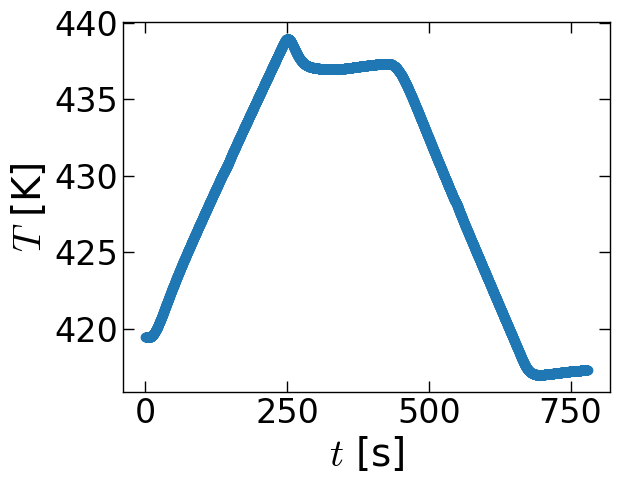

In [42]:
import matplotlib.pyplot as plt

# x 軸: min（時間） / y 軸: cel（摂氏温度）
plt.plot(df["time(s)"], df["temp(K)"], marker='o', linestyle='-')

# ラベル・タイトル
plt.xlabel("$t$ [s]", fontsize=28)
plt.ylabel("$T$ [K]", fontsize=28)

plt.tick_params(labelsize=24)

#fig.savefig('/content/drive/MyDrive/t_T.png', bbox_inches='tight',transparent=True)
plt.savefig('/content/drive/MyDrive/t_T.png', bbox_inches='tight',transparent=True)
files.download("/content/drive/MyDrive/t_T.png")
#plt.title("Temperature vs Time")